# 항공 탑승자 만족도 예측
 - target : satisfaction

## 1. 환경준비

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [48]:
path = 'https://bit.ly/AirlineFile'
data = pd.read_csv(path)

## 2. 데이터 탐색

#### 1) 데이터 확인

In [49]:
data.head(3)

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [50]:
data.tail(3)

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


#### 2) 변수 정보 확인

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

#### 3) 기초통계정보 확인

In [52]:
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


#### 4) 결측치 확인

In [53]:
data.isna().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             6
satisfaction                         0
dtype: int64

#### 5) 상관관계 확인

In [54]:
data.corr()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
id,1.000000,-0.015368,0.099408,-0.027930,-0.011158,-0.006361,-0.014071,0.045138,0.031230,0.053638,0.002769,0.029071,0.041225,0.056449,0.047594,0.067987,0.038136,0.018539,-0.005068,-0.003974
age,-0.015368,1.000000,0.078047,0.010329,0.064441,0.018626,0.009466,0.034049,0.197814,0.177556,0.052257,0.026791,0.024620,-0.073139,0.050525,-0.087237,0.059583,-0.037540,-0.034144,0.115479
flight_distance,0.099408,0.078047,1.000000,0.034791,-0.002179,0.057450,0.016260,0.067810,0.233310,0.151401,0.141815,0.111265,0.143432,0.055050,0.035266,0.053794,0.096767,-0.006341,-0.025196,0.305260
inflight_wifi_service,-0.027930,0.010329,0.034791,1.000000,0.320624,0.717404,0.356636,0.115497,0.451573,0.097381,0.200623,0.129821,0.198738,0.134191,0.023225,0.103834,0.122191,0.030221,0.023121,0.259875
departure/arrival_time_convenient,-0.011158,0.064441,-0.002179,0.320624,1.000000,0.439331,0.459399,0.014700,0.059034,0.018130,0.015226,0.064172,0.035029,0.062816,0.093228,0.072874,0.025242,0.012647,0.012714,-0.059302
ease_of_online_booking,-0.006361,0.018626,0.057450,0.717404,0.439331,1.000000,0.508303,0.034033,0.384504,0.017968,0.050631,0.027163,0.138610,0.046280,-0.006889,0.032867,0.011795,0.023704,0.017871,0.158390
gate_location,-0.014071,0.009466,0.016260,0.356636,0.459399,0.508303,1.000000,-0.016628,0.019022,-0.028575,0.009760,-0.013491,0.018238,0.026451,-0.036886,-0.007018,0.000272,0.013530,0.013358,0.021243
food_and_drink,0.045138,0.034049,0.067810,0.115497,0.014700,0.034033,-0.016628,1.000000,0.239849,0.586710,0.611201,0.088740,0.030205,0.008476,0.059618,0.034685,0.642026,-0.008821,-0.013381,0.208037
online_boarding,0.031230,0.197814,0.233310,0.451573,0.059034,0.384504,0.019022,0.239849,1.000000,0.419603,0.279503,0.143723,0.145477,0.079027,0.184845,0.080524,0.329533,-0.025518,-0.034461,0.475447
seat_comfort,0.053638,0.177556,0.151401,0.097381,0.018130,0.017968,-0.028575,0.586710,0.419603,1.000000,0.599424,0.146237,0.111184,0.047997,0.170750,0.055629,0.691808,-0.027148,-0.030866,0.338773


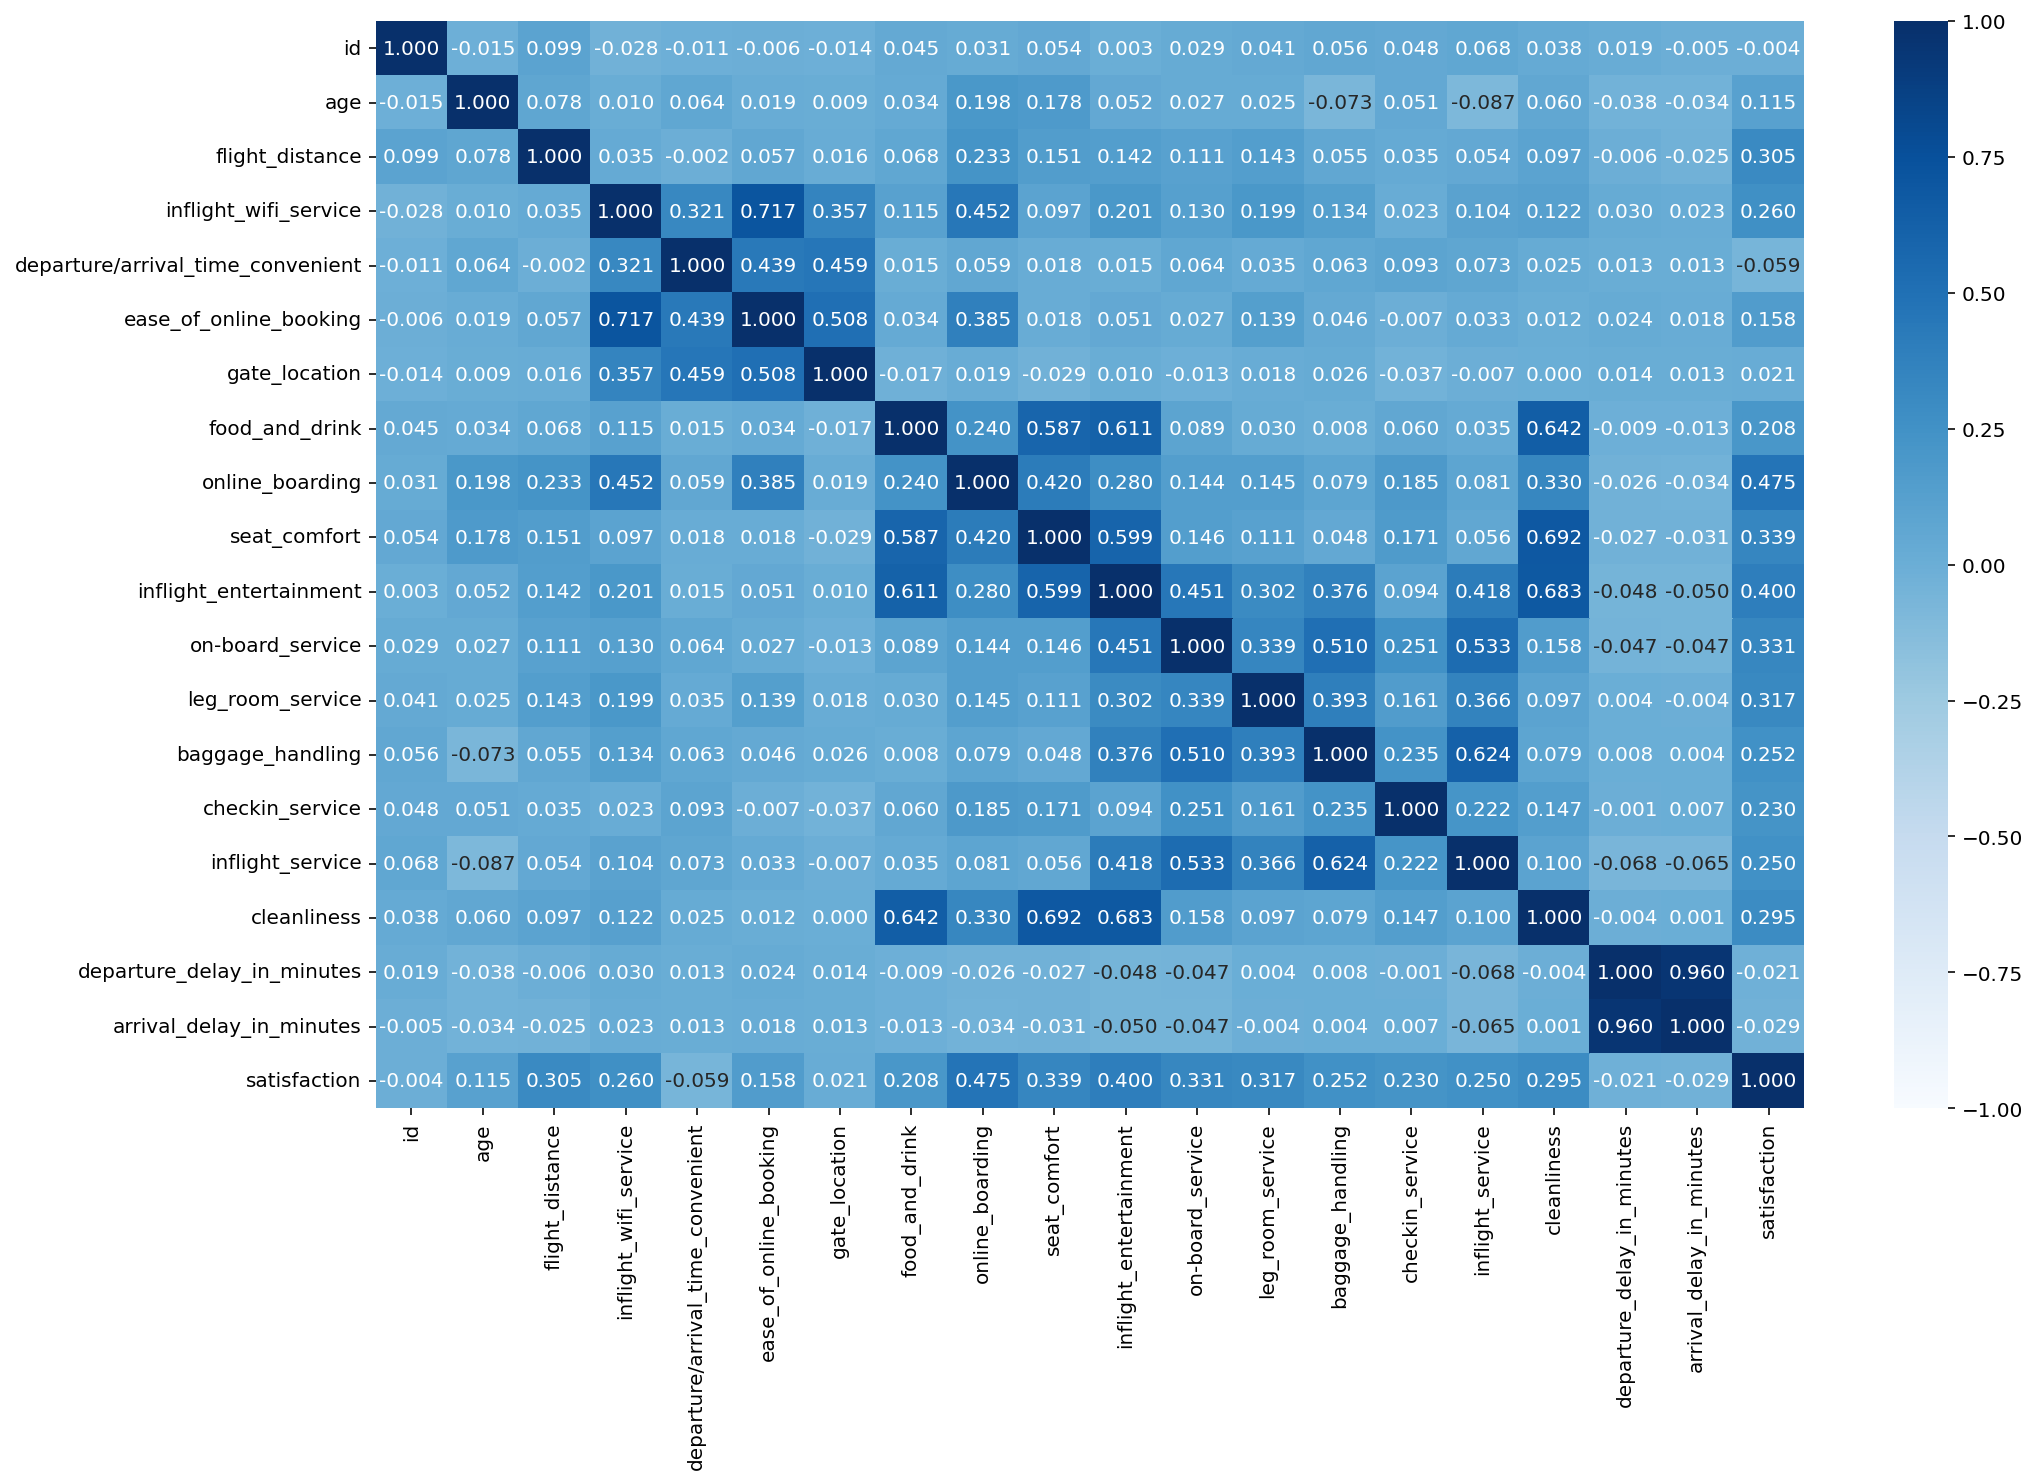

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),
            annot=True, cmap='Blues',
            vmax=1, vmin=-1,
            fmt='.3f')
plt.show()

#### 6) 범주값 변수 확인

In [56]:
print(data['gender'].value_counts())
print('-'*70)
print(data['customer_type'].value_counts())
print('-'*70)
print(data['type_of_travel'].value_counts())
print('-'*70)
print(data['class'].value_counts())
print('-'*70)
print(data['satisfaction'].value_counts())

Female    1335
Male      1245
Name: gender, dtype: int64
----------------------------------------------------------------------
Loyal Customer       2119
disloyal Customer     461
Name: customer_type, dtype: int64
----------------------------------------------------------------------
Business travel    1772
Personal Travel     808
Name: type_of_travel, dtype: int64
----------------------------------------------------------------------
Business    1258
Eco         1129
Eco Plus     193
Name: class, dtype: int64
----------------------------------------------------------------------
0    1478
1    1102
Name: satisfaction, dtype: int64


#### 7) 주요 변수 확인

satisfaction

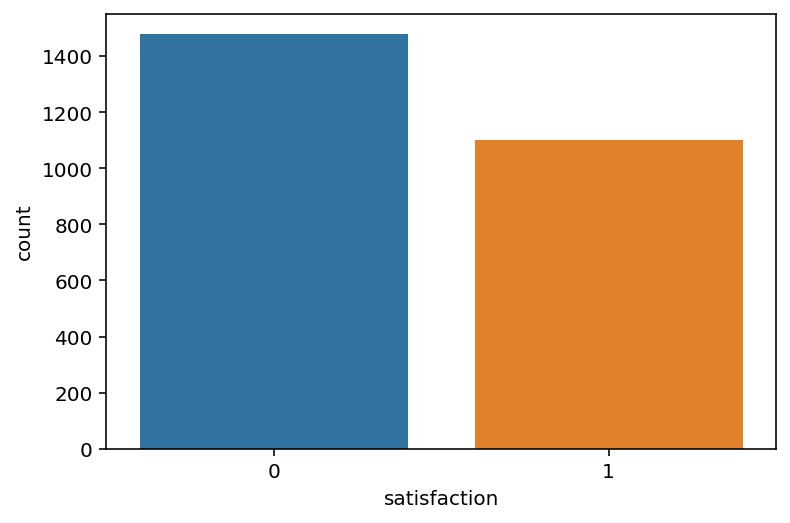

In [57]:
sns.countplot(data=data, x='satisfaction')
plt.show()

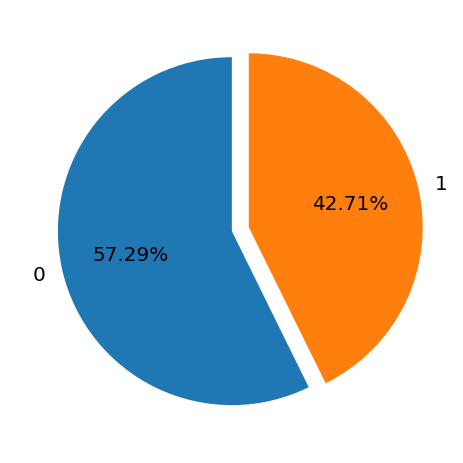

In [58]:
satisfaction = data['satisfaction'].value_counts()

plt.pie(satisfaction.values, labels=satisfaction.index,
        autopct='%.2f%%', startangle=90, explode=[0,0.1])

plt.show()

- 중간, 불만족의 의견이 더 많음.
- 서비스 문제가 있지 않을까 예상.

type_of_travel

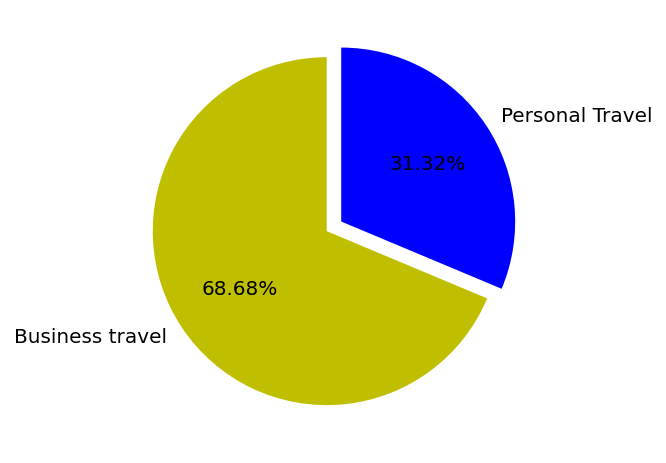

In [59]:
type_of_travel = data['type_of_travel'].value_counts()

plt.pie(type_of_travel.values, labels=type_of_travel.index,
        autopct='%.2f%%', startangle=90, explode=[0,0.1],
        colors=['y', 'blue'])

plt.show()

age

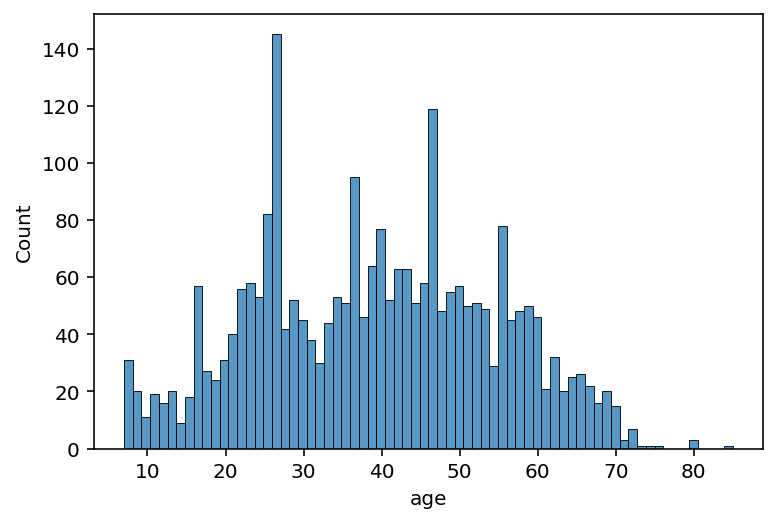

In [60]:
sns.histplot(data=data, x='age', bins=70)
plt.show()

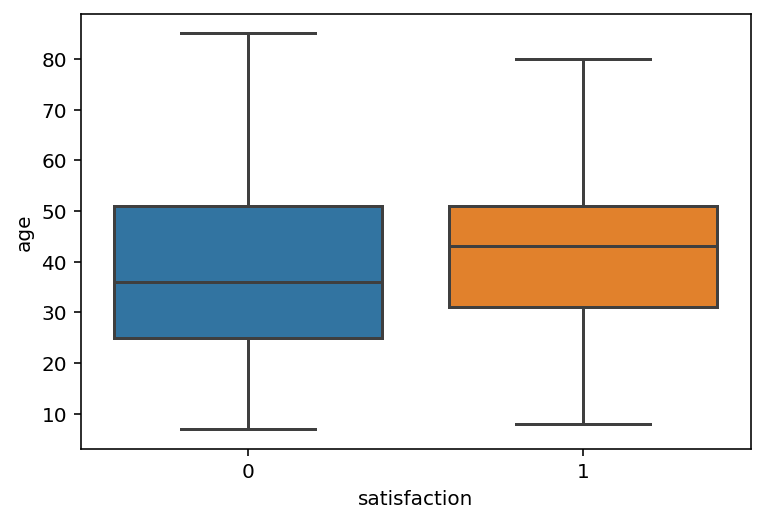

In [61]:
sns.boxplot(data=data, y='age', x='satisfaction')
plt.show()

- 집단으로 나눌만한 규칙이 보이지 않음.
- 사용 나이대가 20대~60대로 비교적 고르게 분포.

## 3. 데이터 준비

#### 1) 불필요 변수 제거

In [62]:
cols = ['id', 'departure/arrival_time_convenient', 
        'gate_location', 'departure_delay_in_minutes']

data = data.drop(columns=cols, axis=1)

#### 2) 결측치 처리
- 개수가 많지 않으므로 제거

In [63]:
data.dropna(axis=0, inplace=True)

data.isna().sum()

gender                      0
customer_type               0
age                         0
type_of_travel              0
class                       0
flight_distance             0
inflight_wifi_service       0
ease_of_online_booking      0
food_and_drink              0
online_boarding             0
seat_comfort                0
inflight_entertainment      0
on-board_service            0
leg_room_service            0
baggage_handling            0
checkin_service             0
inflight_service            0
cleanliness                 0
arrival_delay_in_minutes    0
satisfaction                0
dtype: int64

#### 3) 가변수화

In [64]:
cols1 = ['gender', 'customer_type', 'type_of_travel', 'class']
data = pd.get_dummies(data=data, columns=cols1, drop_first=True)

data.head(3)

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,4,5,5,18.0,0,1,0,1,0,1
1,25,235,3,3,1,3,1,1,1,5,...,1,4,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,4,4,5,0.0,1,0,0,0,0,0


#### 4) x,y 분리

In [65]:
target='satisfaction'

x = data.drop(target, axis=1)
y = data[target]

#### 5) 정규화
 - KNN

In [66]:
x = (x - x.min()) / (x.max() - x.min())

x.head(3)

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,0.076923,0.080270,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.75,1.0,1.0,0.038298,1.0,0.0,1.0,0.0,1.0
1,0.230769,0.034314,0.6,0.6,0.2,0.6,0.0,0.2,0.2,1.0,0.50,0.00,0.8,0.0,0.012766,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.219567,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.75,0.8,1.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### 6) train,test 분리

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

## 4. 모델링

#### KNN

In [68]:
# 1. 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2. 선언하기
model = KNeighborsClassifier()

# 3. 학습하기
model.fit(x_train,y_train)

# 4. 예측하기
y_pred = model.predict(x_test)

# 5. 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[424  19]
 [ 58 272]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       443
           1       0.93      0.82      0.88       330

    accuracy                           0.90       773
   macro avg       0.91      0.89      0.90       773
weighted avg       0.90      0.90      0.90       773



성능정보 수집

In [69]:
score = {}
score['KNN'] = accuracy_score(y_test, y_pred)

#### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=2022)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[397  46]
 [ 41 289]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       443
           1       0.86      0.88      0.87       330

    accuracy                           0.89       773
   macro avg       0.88      0.89      0.89       773
weighted avg       0.89      0.89      0.89       773



변수 중요도 확인

[0.04053097 0.04717893 0.14992541 0.00352718 0.00835257 0.34103811
 0.01409921 0.07917043 0.01372986 0.00756916 0.00976572 0.0299972
 0.00932092 0.02206727 0.01547393 0.         0.03804921 0.16079078
 0.00635049 0.00306266]


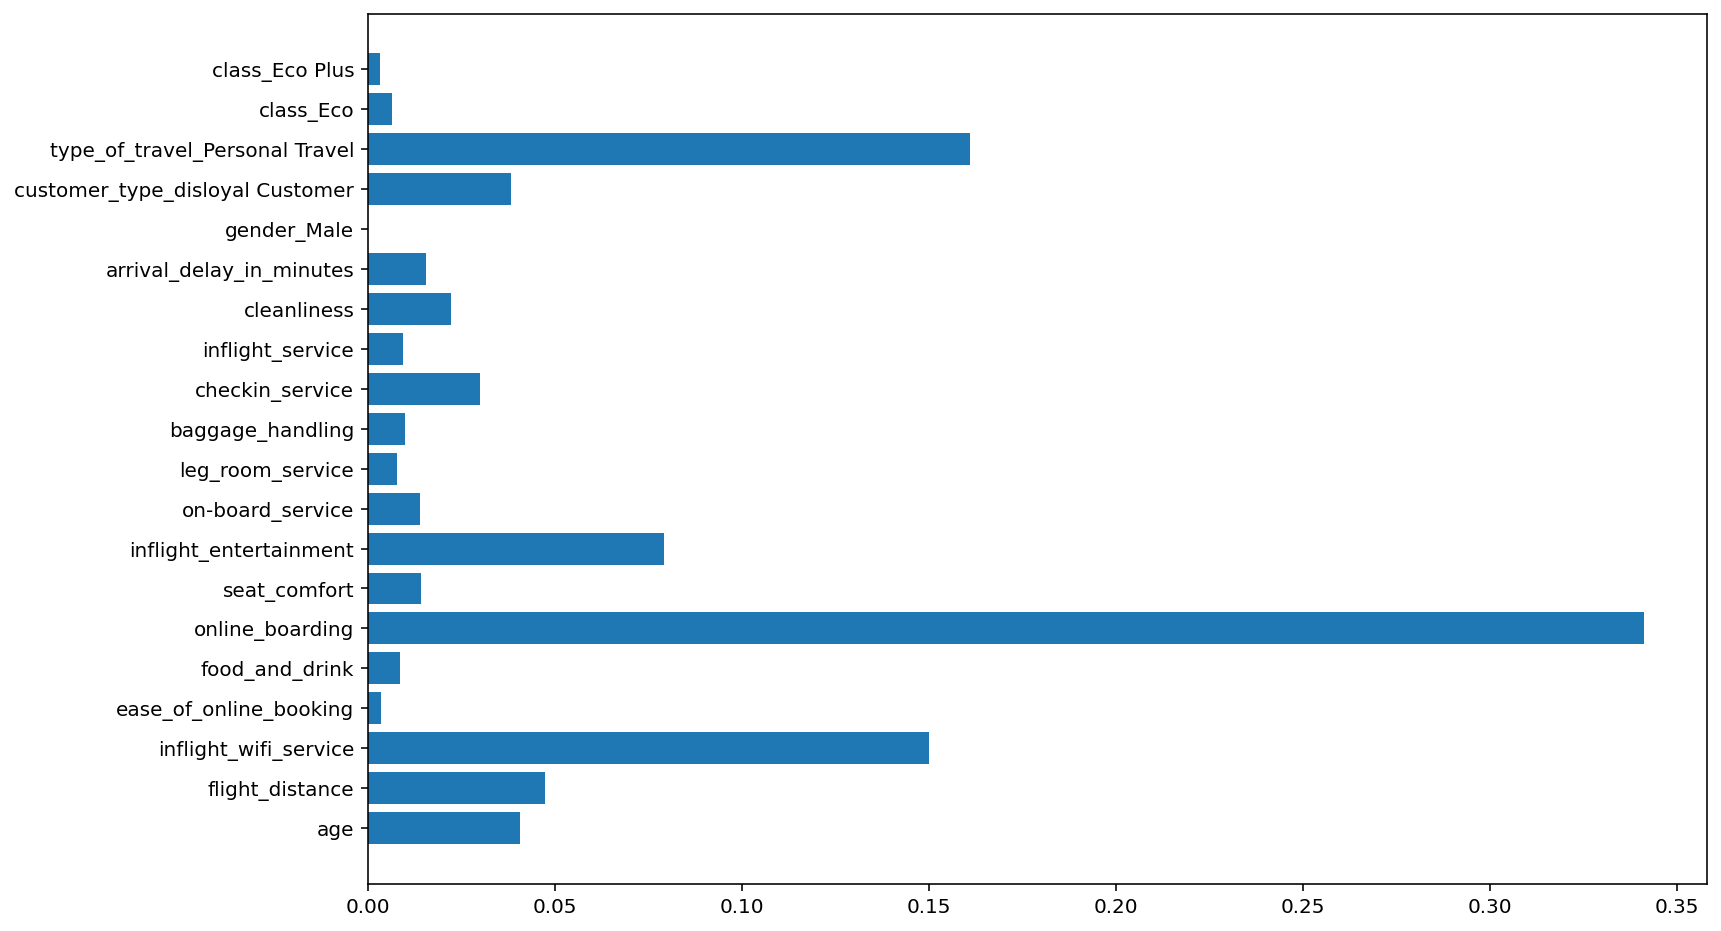

In [71]:
print(model.feature_importances_)

plt.figure(figsize=(12,8))
plt.barh(list(x), model.feature_importances_)

plt.show()

성능정보 수집

In [72]:
score['Decision Tree'] = accuracy_score(y_test, y_pred)

#### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2022)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[419  24]
 [ 34 296]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       443
           1       0.93      0.90      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



변수 중요도 확인

[0.0478066  0.0571299  0.11605022 0.04261728 0.01677401 0.14443124
 0.05120355 0.06557354 0.03270252 0.04072262 0.02480892 0.02631766
 0.02083523 0.03348183 0.02368498 0.00773758 0.03597169 0.12277202
 0.08303822 0.00634039]


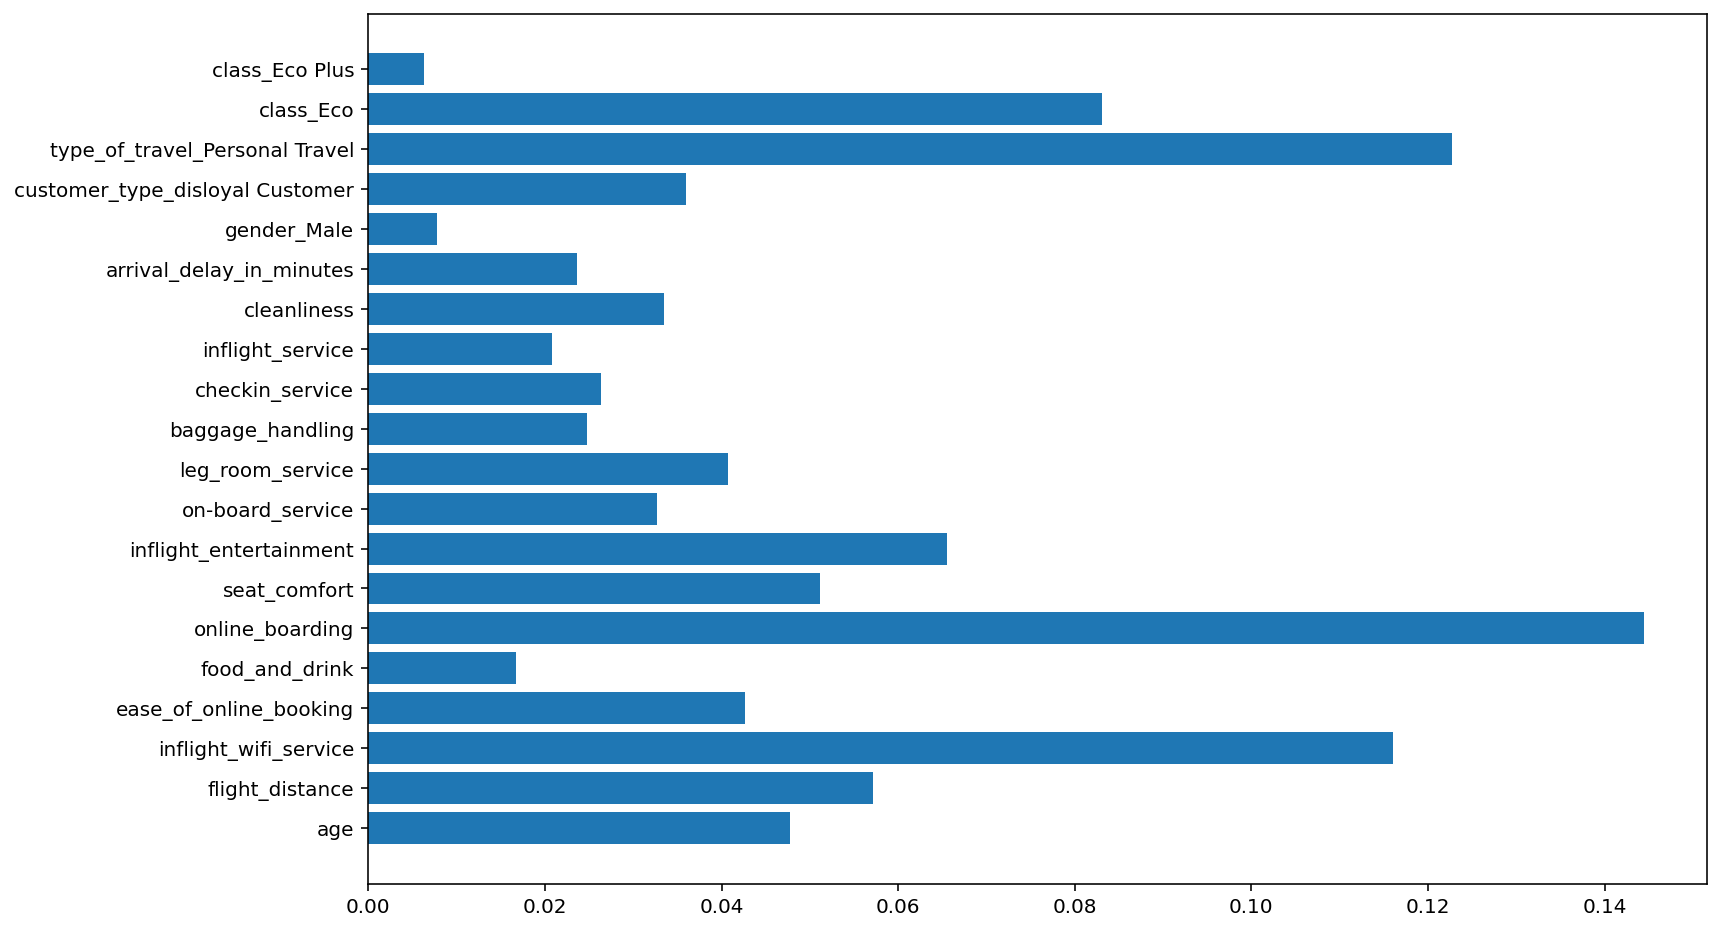

In [74]:
print(model.feature_importances_)

plt.figure(figsize=(12,8))
plt.barh(list(x), model.feature_importances_)

plt.show()

성능정보 수집

In [75]:
score['Random Forest'] = accuracy_score(y_test, y_pred)

#### XGBoost

In [76]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=2022)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[23:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[425  18]
 [ 31 299]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       443
           1       0.94      0.91      0.92       330

    accuracy                           0.94       773
   macro avg       0.94      0.93      0.93       773
weighted avg       0.94      0.94      0.94       773



변수 중요도 확인


[0.01303819 0.00812713 0.08274984 0.02049681 0.02103555 0.29923883
 0.03023352 0.05858029 0.02421418 0.0258929  0.02683791 0.02264929
 0.01095796 0.0305847  0.01446378 0.01316585 0.0704421  0.19866794
 0.02862328 0.        ]


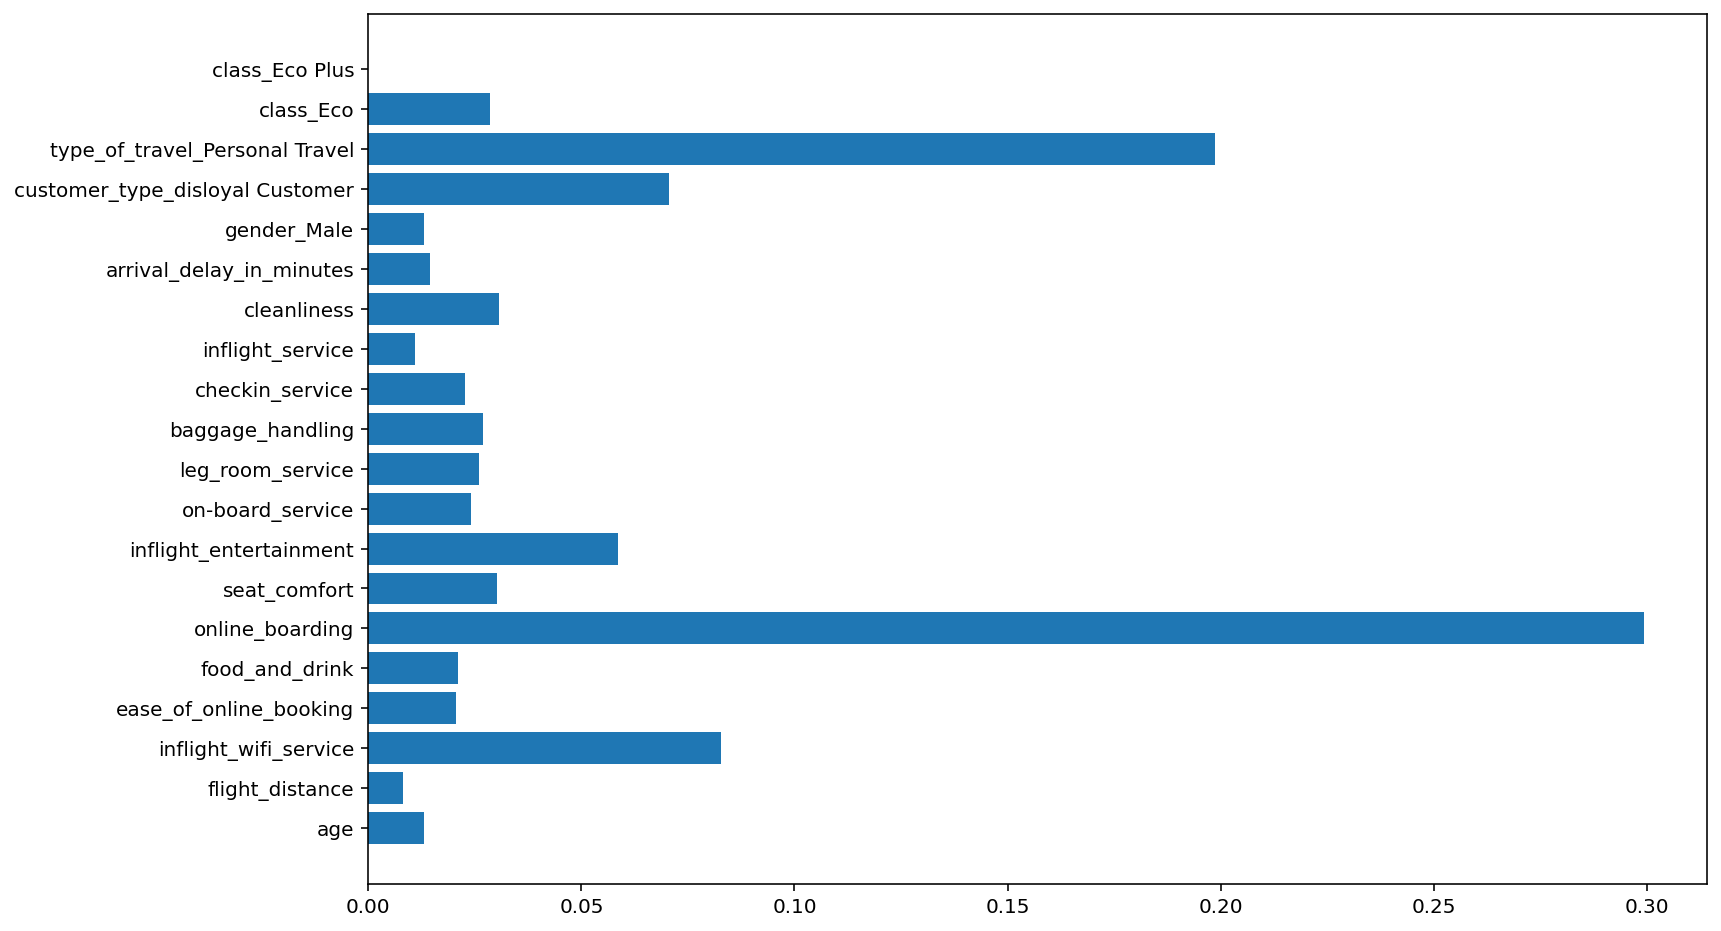

In [77]:
print(model.feature_importances_)

plt.figure(figsize=(12,8))
plt.barh(list(x), model.feature_importances_)

plt.show()

성능 정보 수집

In [78]:
score['XGBoost'] = accuracy_score(y_test, y_pred)

#### 5. 정리

In [79]:
score

{'KNN': 0.9003880983182406,
 'Decision Tree': 0.88745148771022,
 'Random Forest': 0.92496765847348,
 'XGBoost': 0.9366106080206986}

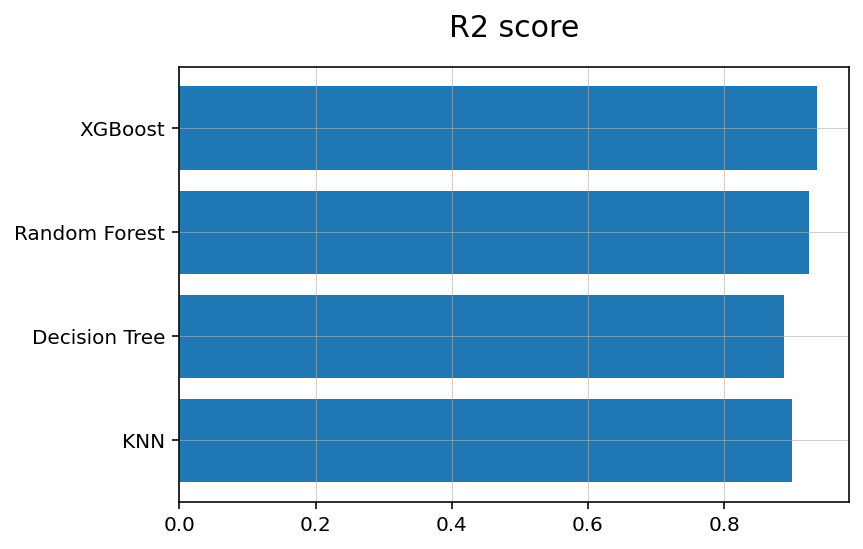

In [80]:
plt.barh(list(score.keys()), score.values())

plt.title('R2 score', size=15, pad=15)
plt.grid(linewidth=0.3)
plt.show()

- 앙상블 기법의 영향력이 대체로 높다.
- Random Forest 기법을 튜닝해볼만 하다.

## 6. 튜닝

In [81]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth':range(5,11,1), 'n_estimators':range(50,160,10)}

model_rf = RandomForestClassifier(random_state=2022)

model = RandomizedSearchCV(model_rf,
                           param,
                           cv=10,
                           n_iter=20,
                           scoring='accuracy')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [82]:
print('Random Search mean_test_score')
print(model.cv_results_['mean_test_score'])
print('\n')

print(model.best_params_)
print(model.best_score_)
print('-'*70)
print('혼동행렬')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('정확도 :', accuracy_score(y_test,y_pred))

Random Search mean_test_score
[0.93005218 0.93172192 0.92172805 0.92839472 0.92894721 0.93116636
 0.92839472 0.92672805 0.91784223 0.93005832 0.92727747 0.92339165
 0.92839472 0.92783303 0.92395335 0.91506446 0.92950276 0.93227747
 0.93116636 0.91673112]


{'n_estimators': 120, 'max_depth': 10}
0.9322774708410068
----------------------------------------------------------------------
혼동행렬
[[417  26]
 [ 32 298]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       443
           1       0.92      0.90      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773

정확도 : 0.92496765847348


- {'n_estimators': 50, 'max_depth': 9}
- 0.9250 -> 0.926261319534282 (train보다는 감소하였음.)
- 'n_estimators': range(30,81,10), 'max_depth': range(7,12,1) 로 파라미터 설정하여 Grid search 해볼법 함.
- 

In [83]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': range(30,81,10), 'max_depth': range(7,12,1)}

model = GridSearchCV(model_rf,
                     param,
                     cv=10,
                     scoring='accuracy')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [84]:
print(model.best_params_)
print(model.best_score_)
print('-'*70)
print('혼동행렬')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('정확도 :', accuracy_score(y_test,y_pred))

{'max_depth': 9, 'n_estimators': 50}
0.9328360957642724
----------------------------------------------------------------------
혼동행렬
[[418  25]
 [ 32 298]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       443
           1       0.92      0.90      0.91       330

    accuracy                           0.93       773
   macro avg       0.93      0.92      0.92       773
weighted avg       0.93      0.93      0.93       773

정확도 : 0.926261319534282


- {'n_estimators': 50, 'max_depth': 9}
- 0.926261319534282 -> 0.926261319534282
- 

- online boarding 이 satisfaction에 매우 영향이 높은 것으로 확인되었다.
- 온라인 탑승 절차에 불편하지 않은 서비스를 통해 만족도를 높여야 할 것이다.
- 어플을 통해 탑승절차를 진행하거나, 좌석 지정에 대한 서비스를 높일 수 있다.